# **Credit Risk Prediction Using Machine Learning**

### **The credit risk dataset contains simulated credit bureau data. In this notebook, we will deploy different machine learning models, starting with basic models and gradually moving on to more complex models.**
### **Aim is to predict the customer loan status.**

## **Feature Description**

### **person_age: Age of the individual applying for the loan.**
### **person_income: Annual income of the individual.**
### **person_home_ownership: Type of home ownership of the individual.**
### **rent: The individual is currently renting a property.**
### **mortgage: The individual has a mortgage on the property they own.**
### **own: The individual owns their home outright.**
### **other: Other categories of home ownership that may be specific to the dataset.**
### **person_emp_length: Employment length of the individual in years.**
### **person_emp_length: Employment length of the individual in years.**
### **loan_intent: The intent behind the loan application.**
### **loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.**
 ### **A: The borrower has a high creditworthiness, indicating low risk.**
 ### **B: The borrower is relatively low-risk, but not as creditworthy as Grade A.**
 ### **C: The borrower's creditworthiness is moderate.**
 ### **D: The borrower is considered to have higher risk compared to previous grades.**
 ### **E: The borrower's creditworthiness is lower, indicating a higher risk.**
 ### **F: The borrower poses a significant credit risk.**
 ### **G: The borrower's creditworthiness is the lowest, signifying the highest risk.**
### **loan_amnt: The loan amount requested by the individual.**
### **loan_int_rate: The interest rate associated with the loan.**
### **loan_status: Loan status, where 0 indicates non-default and 1 indicates default.**
 ### **0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.**
 ### **1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.**
### **loan_percent_income: The percentage of income represented by the loan amount.**
### **cb_person_default_on_file: Historical default of the individual as per credit bureau records.**
 ### **Y: The individual has a history of defaults on their credit file.**
 ### **N: The individual does not have any history of defaults.**
### **cb_preson_cred_hist_length: The length of credit history for the individual.**

## **1. Import Libraries**

In [1]:
!pip install missingno

In [2]:
!pip install wordcloud

In [3]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

## **2. Read and Explain Dataset**

In [4]:
#Read data
data_original =  pd.read_csv("/content/credit_risk_dataset.csv")
data = pd.read_csv("/content/credit_risk_dataset.csv")


In [5]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## **3. Exploratory Data Analysis**

In [6]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [8]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [12]:
data.loan_status.value_counts()


0    25473
1     7108
Name: loan_status, dtype: int64

In [13]:
data.duplicated().sum()


165

In [14]:
data.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


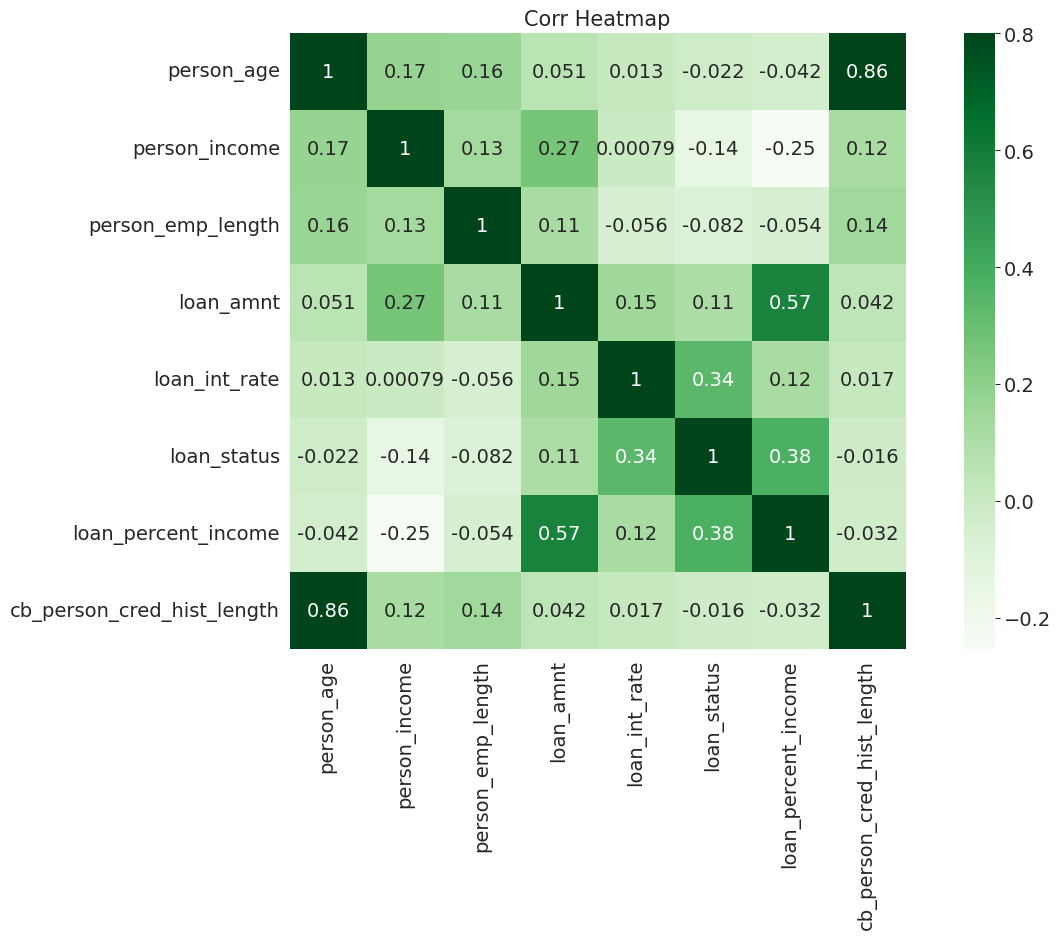

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Corr Heatmap',fontsize=15);

## **4.Univarient Analysis**

In [16]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


In [17]:
#max and min income

max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [18]:
#min and max loan amount

max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [19]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()


### **Observations: Most of the People taking a loan doesnt own their own house**

In [20]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

### **Observations: Loan Grade A and B comprises of 65.2% of total.**

In [21]:
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

### **Observations:Loan Intent are equally almost distributed**

In [22]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

#### **Here below we plot all the features separately in order to show any dependence on the target.**

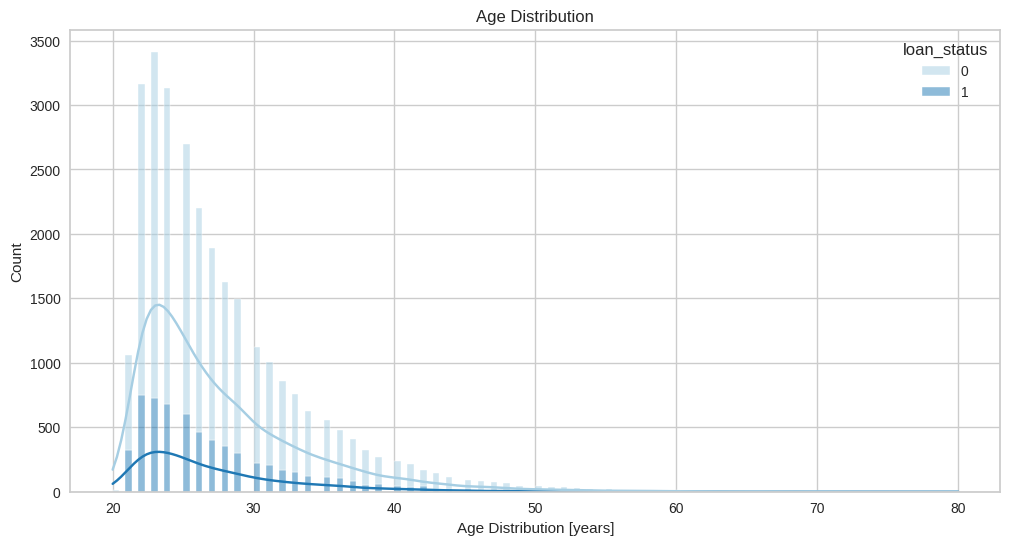

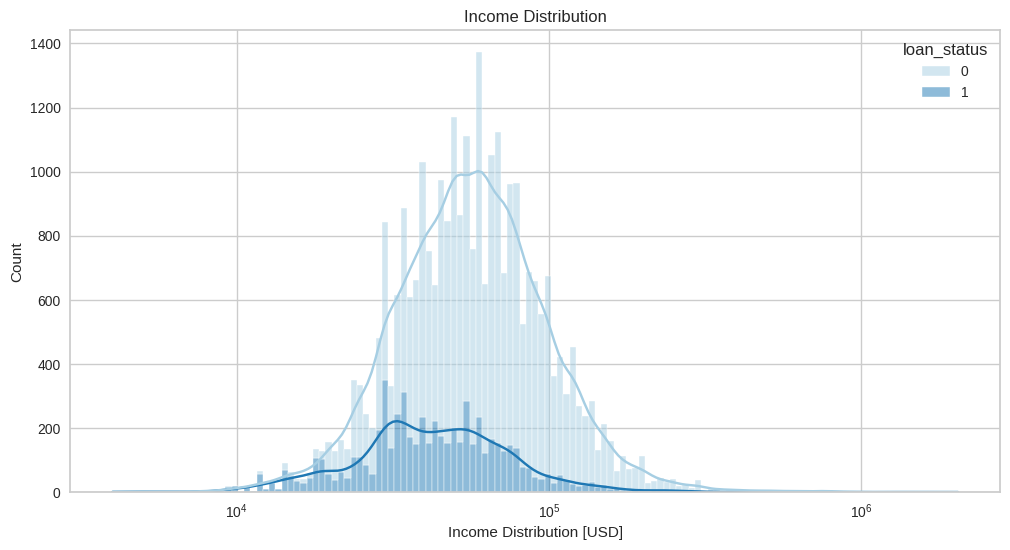

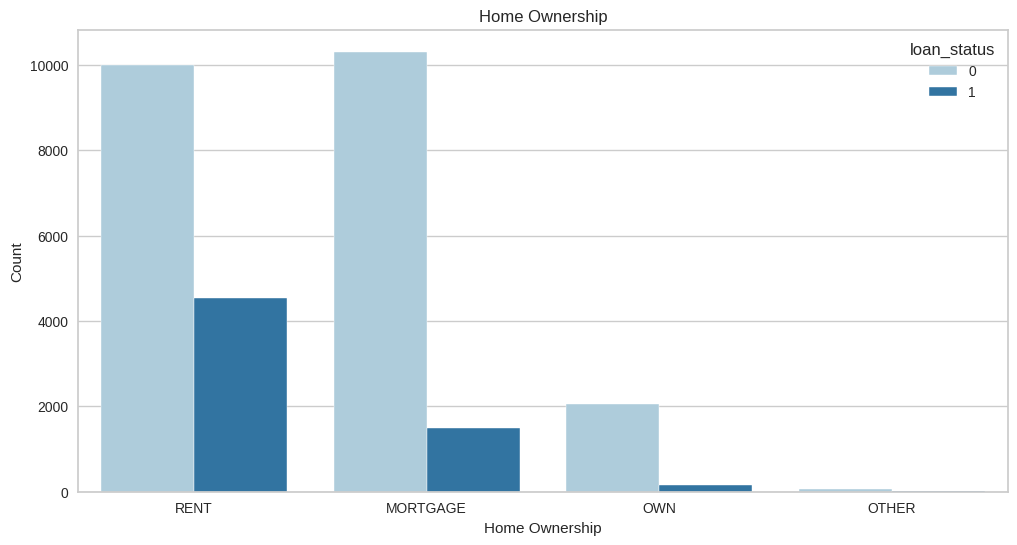

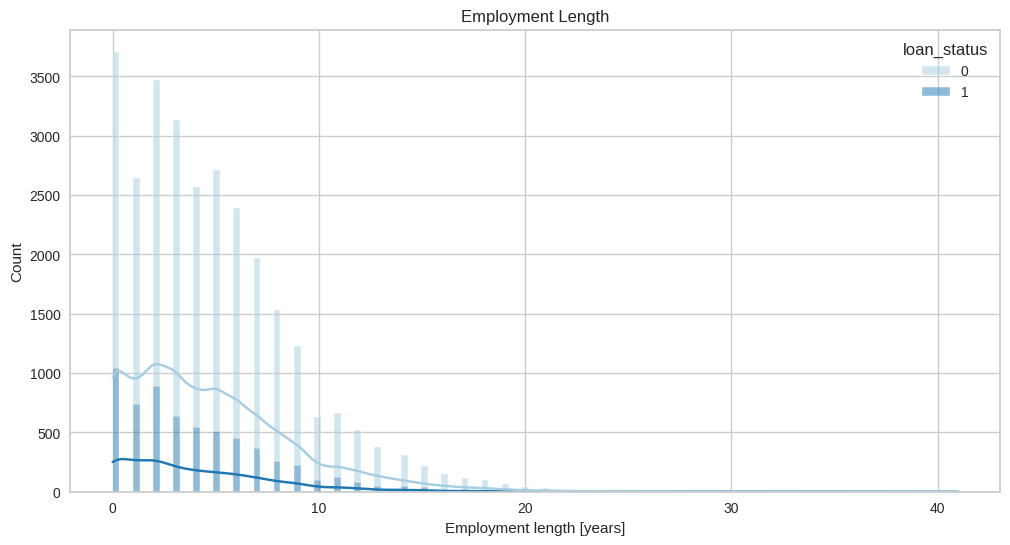

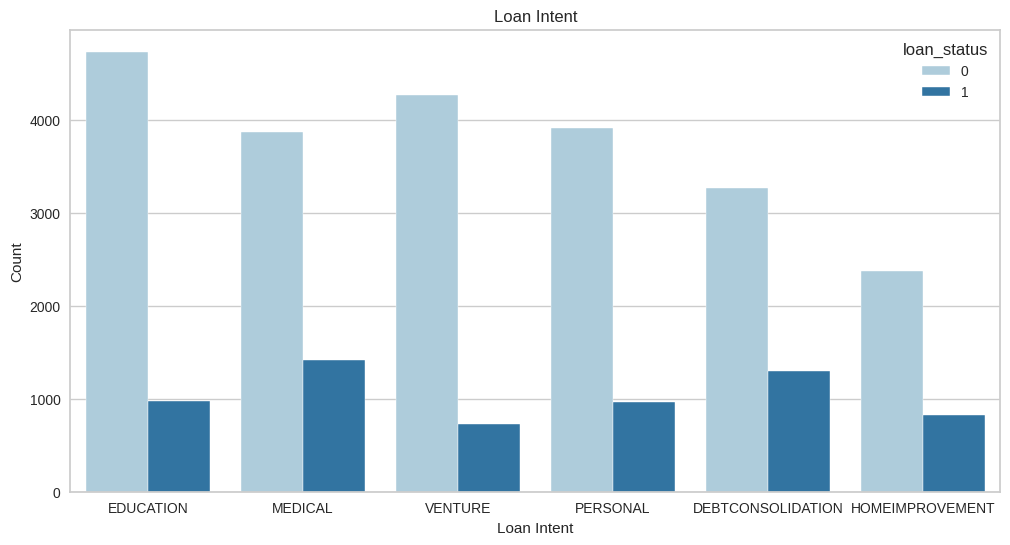

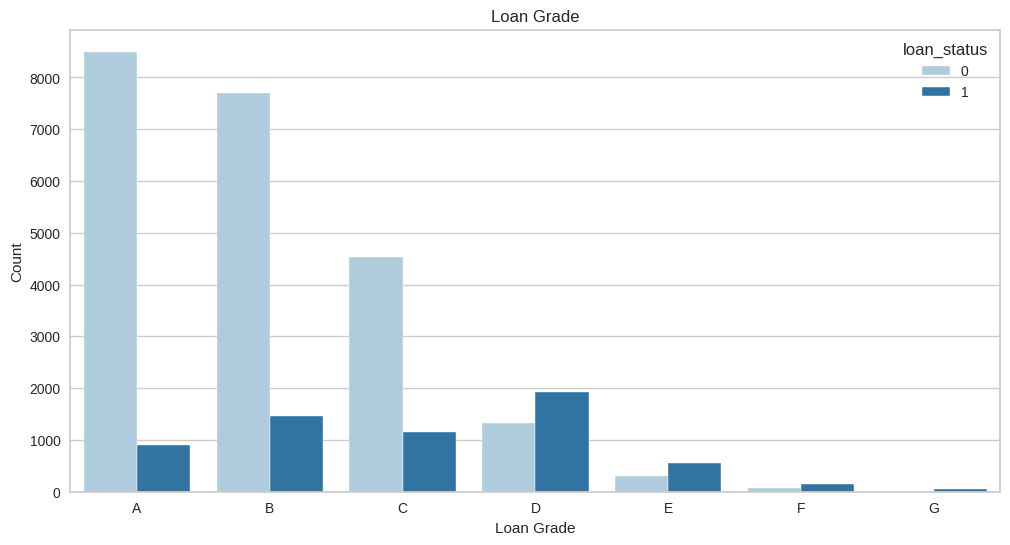

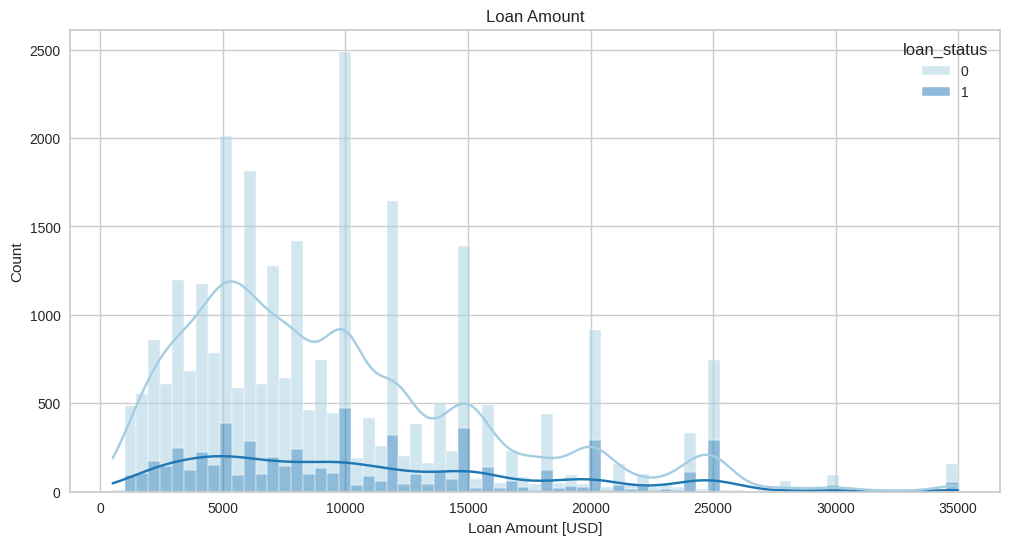

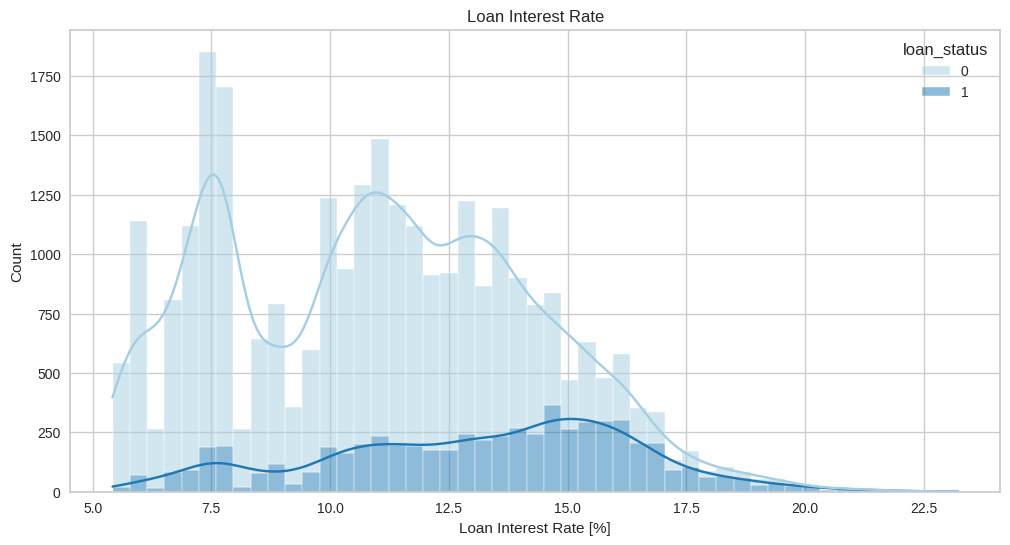

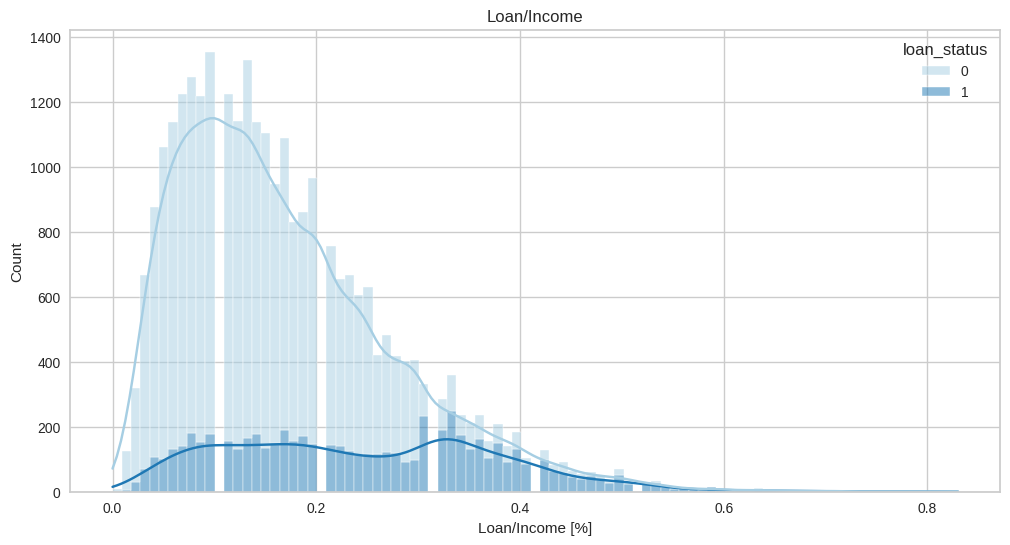

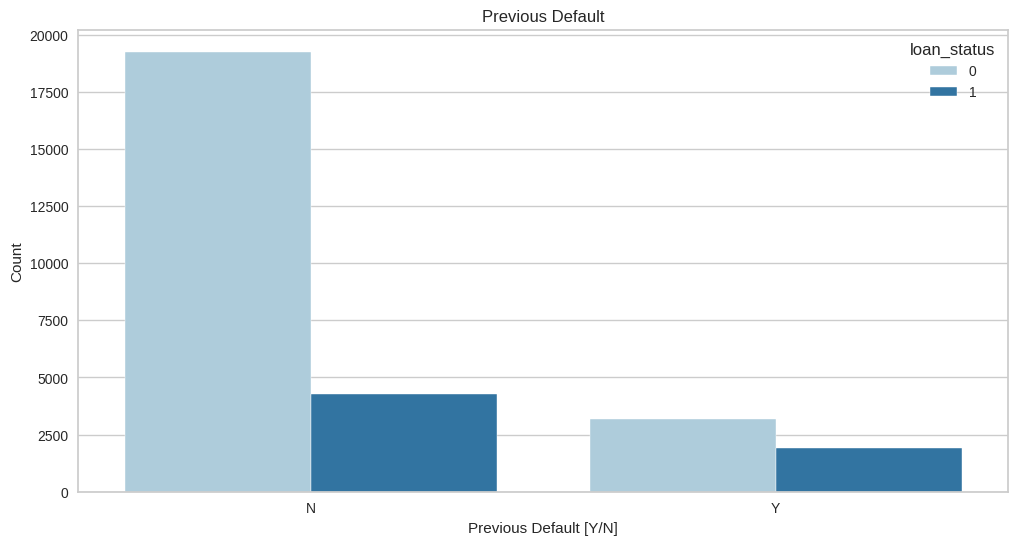

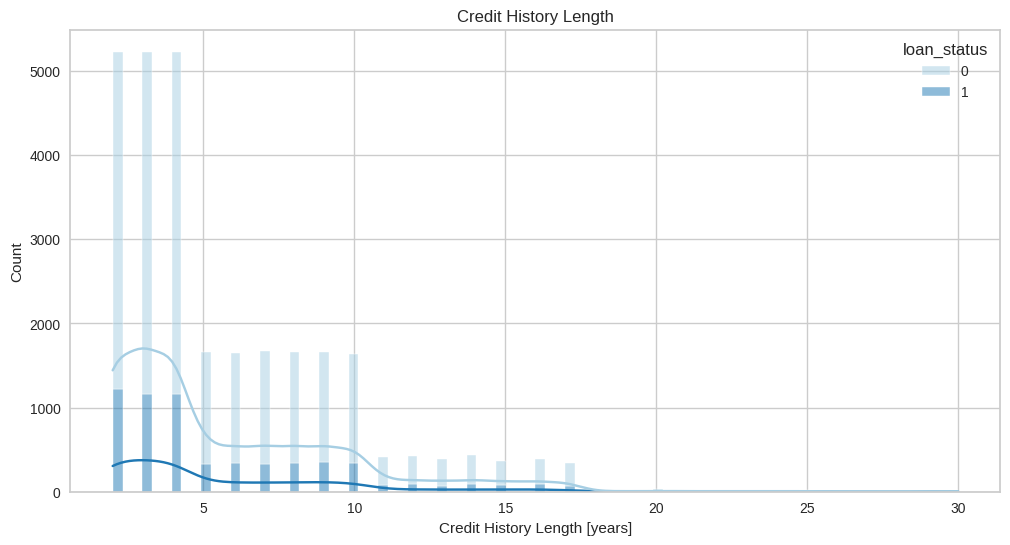

In [91]:
#Plot Features

sns.set_palette('Paired')

#Plot Age Distribution
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='person_age', hue='loan_status', multiple='stack', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age Distribution [years]')
plt.ylabel('Count')
plt.show()

#Plot Income Distribution
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='person_income', hue='loan_status', multiple='stack', log_scale=True, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income Distribution [USD]')
plt.ylabel('Count')
plt.show()

#Plot Home Ownership
plt.figure(figsize = (12,6))
# Create a new DataFrame with the value counts for 'loan_intent' and 'loan_status'
home_counts = data.groupby(['person_home_ownership', 'loan_status']).size().reset_index(name='count')
home_order = data['person_home_ownership'].value_counts().sort_values(ascending=False).index
# Create a barplot of 'loan_intent' with 'loan_status' as a hue
sns.barplot(x='person_home_ownership', y='count', hue='loan_status', data=home_counts, order=home_order)
plt.title('Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

#Plot Employment Length
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='person_emp_length', hue='loan_status', multiple='stack', kde=True)
plt.title('Employment Length')
plt.xlabel('Employment length [years]')
plt.ylabel('Count')
plt.show()

#Plot Loan Intent
plt.figure(figsize = (12,6))
# Create a new DataFrame with the value counts for 'loan_intent' and 'loan_status'
intent_counts = data.groupby(['loan_intent', 'loan_status']).size().reset_index(name='count')
intent_order = data['loan_intent'].value_counts().sort_values(ascending=False).index
# Create a barplot of 'loan_intent' with 'loan_status' as a hue
sns.barplot(x='loan_intent', y='count', hue='loan_status', data=intent_counts, order=intent_order)
plt.title('Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

#Plot Loan Grade
plt.figure(figsize = (12,6))
# Create a new DataFrame with the value counts for 'loan_intent' and 'loan_status'
grade_counts = data.groupby(['loan_grade', 'loan_status']).size().reset_index(name='count')
grade_order = data['loan_grade'].value_counts().sort_values(ascending=False).index
# Create a barplot of 'loan_intent' with 'loan_status' as a hue
sns.barplot(x='loan_grade', y='count', hue='loan_status', data=grade_counts, order=grade_order)
plt.title('Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

#Plot Loan Amount
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='loan_amnt', hue='loan_status', multiple='stack', kde=True)
plt.title('Loan Amount')
plt.xlabel('Loan Amount [USD]')
plt.ylabel('Count')
plt.show()

#Plot Interest Rate
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='loan_int_rate', hue='loan_status', multiple='stack', kde=True)
plt.title('Loan Interest Rate')
plt.xlabel('Loan Interest Rate [%]')
plt.ylabel('Count')
plt.show()

#Plot Loan/Income
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='loan_percent_income', hue='loan_status', multiple='stack', kde=True)
plt.title('Loan/Income')
plt.xlabel('Loan/Income [%]')
plt.ylabel('Count')
plt.show()

#Plot Previous Default
plt.figure(figsize = (12,6))
# Create a new DataFrame with the value counts for 'loan_intent' and 'loan_status'
default_counts = data.groupby(['cb_person_default_on_file', 'loan_status']).size().reset_index(name='count')
default_order = data['cb_person_default_on_file'].value_counts().sort_values(ascending=False).index
# Create a barplot of 'loan_intent' with 'loan_status' as a hue
sns.barplot(x='cb_person_default_on_file', y='count', hue='loan_status', data=default_counts, order=default_order)
plt.title('Previous Default')
plt.xlabel('Previous Default [Y/N]')
plt.ylabel('Count')
plt.show()

#Plot Credit History Length
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='cb_person_cred_hist_length', hue='loan_status', multiple='stack', kde=True)
plt.title('Credit History Length')
plt.xlabel('Credit History Length [years]')
plt.ylabel('Count')
plt.show()

## **5. Dealing with Outliers**

In [24]:
data.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [25]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [26]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [27]:
data['loan_status'].value_counts()


0    22435
1     6203
Name: loan_status, dtype: int64

In [28]:
data.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [29]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

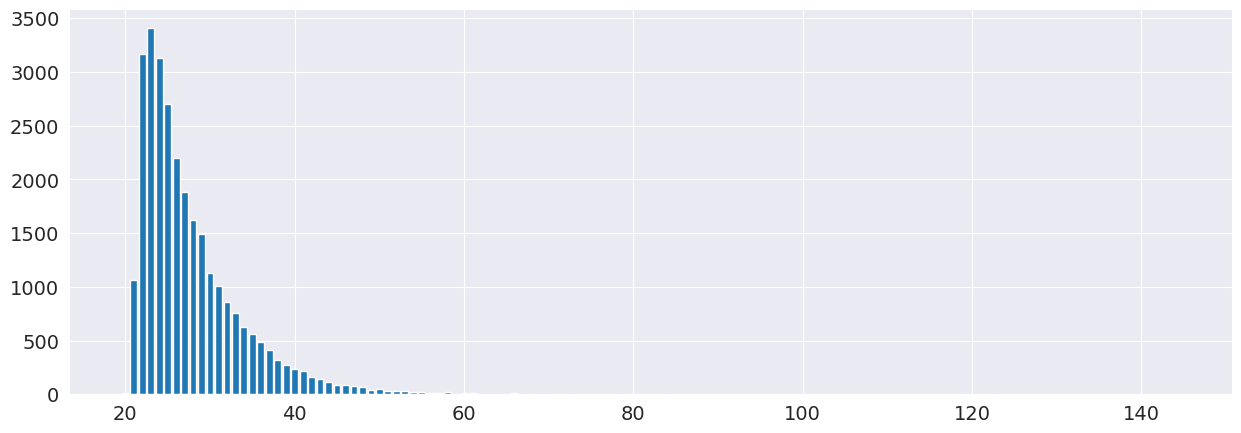

In [30]:
import matplotlib.pyplot as plt

verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [31]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

25

## **6. Feature Engineering**

In [32]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [33]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [34]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True)

In [35]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


## **Income Group**

In [36]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [37]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [38]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25,middle
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle


## **Loan Amount**

In [39]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [40]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [41]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [42]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [43]:
data['person_home_ownership'].value_counts()

RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [44]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [45]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [46]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [47]:
raw_data = data.copy()

In [48]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [49]:
data = data.drop(drop_colums, axis=1)

In [50]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

## **7. Data Preprocessing**

In [51]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [53]:
print(x_train.shape,x_test.shape)

(22904, 17) (5727, 17)


In [54]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [55]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [56]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [57]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [58]:
merge_ohe_col = np.concatenate((ohe.categories_[0],
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [59]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [60]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [61]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [62]:
X_new.head()
X_new.shape


(22904, 45)

In [63]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35,66000,4.0,3000,6.03,0.05,7,0.045455,0.001333,0.002010
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35,33144,3.0,8400,14.91,0.25,8,0.253440,0.000357,0.001775
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32,36000,4.0,6000,16.07,0.17,10,0.166667,0.000667,0.002678
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,61500,1.0,18000,13.23,0.29,2,0.292683,0.000056,0.000735
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,24000,7.0,2800,10.99,0.12,9,0.116667,0.002500,0.003925


In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [65]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,0.296643,0.045455,0.530868,0.076675
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.543970,0.253440,-0.380924,-0.049526
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,1.038624,0.166667,-0.091820,0.435586
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,-0.939991,0.292683,-0.662616,-0.608033
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,0.791297,0.116667,1.620571,1.105078


## **8. ML Classification Models**

In [66]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [67]:
!pip install hyperopt

In [68]:
!pip install bayesian-optimization


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier

In [70]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = lgb.LGBMClassifier()

In [71]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc,
#     'NB': mnb,
#     'DT': dtc,
#     'LR': lrc,
#     'RF': rfc,
#     'AdaBoost': abc,
#     'BgC': bc,
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [72]:
clf = {
    'KN' : knc,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [73]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, precision, recall, specificity

# Usage
# accuracy, precision, recall, specificity = train_classifier(clf, x_train, y_train, X_test, y_test)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)

In [74]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [75]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():

    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)


For  KN
Accuracy -  0.7943076654443862
Precision -  0.5565068493150684
Recall -  0.2612540192926045
Specificity -  0.9422261878206558

For  xgb
Accuracy -  0.9427274314649904
Precision -  0.9731404958677686
Recall -  0.7572347266881029
Specificity -  0.9942003122908767

For  cat
Accuracy -  0.9432512659332984
Precision -  0.9852164730728616
Recall -  0.75
Specificity -  0.996877091233549

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216469 -> initscore=-1.286365
[LightGBM] [Info] Start training from score -1.286365
For  lgb
Accuracy -  0.939060590186

## **9.Hyperparameter Tuning**

In [ ]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree

    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

In [77]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'colsample_bytree': 0.6484407293128263,
 'learning_rate': 0.281342645574281,
 'max_depth': 12,
 'min_child_weight': 0.09866921522847334,
 'num_leaves': 2149,
 'subsample': 0.5674406508328137}

## **10. Training Final Model**

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216469 -> initscore=-1.286365
[LightGBM] [Info] Start training from score -1.286365
For ensemble
Accuracy -  0.9360921948664223
Precision -  0.9943693693693694
Recall -  0.7098070739549839
Specificity -  0.9988846754405531


In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)

feature_scores

loan_to_income_ratio          0.231378
loan_int_rate                 0.156013
RENT                          0.124359
person_income                 0.101440
index                         0.047152
person_emp_length             0.037362
MEDICAL                       0.031737
int_rate_to_loan_amt_ratio    0.030749
loan_to_emp_length_ratio      0.029015
DEBTCONSOLIDATION             0.028231
person_age                    0.026697
C                             0.025695
loan_percent_income           0.019253
D                             0.018748
cb_person_cred_hist_length    0.014925
loan_amnt                     0.013911
HOMEIMPROVEMENT               0.010646
OWN                           0.010358
MORTGAGE                      0.005003
EDUCATION                     0.004729
PERSONAL                      0.004069
VENTURE                       0.003418
G                             0.003168
Y                             0.002085
N                             0.002021
26-35                    

## **11. Auto ML using PyCaret**

In [80]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.7 MB/s e

In [81]:
from pycaret.classification import *

In [82]:
from pycaret.datasets import get_data

In [83]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [84]:
model = setup(data = raw_data, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28631, 18)"
4,Transformed data shape,"(28631, 43)"
5,Transformed train set shape,"(20041, 43)"
6,Transformed test set shape,"(8590, 43)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,7


In [85]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9372,0.9433,0.7270,0.9775,0.8338,0.7961,0.8094,12.0530
lightgbm,Light Gradient Boosting Machine,0.9354,0.9415,0.7226,0.9722,0.8290,0.7903,0.8035,2.0140
xgboost,Extreme Gradient Boosting,0.9339,0.9444,0.7328,0.9508,0.8276,0.7875,0.7978,1.0450
rf,Random Forest Classifier,0.9322,0.9268,0.7127,0.9653,0.8199,0.7793,0.7930,3.4090
gbc,Gradient Boosting Classifier,0.9282,0.9246,0.7028,0.9536,0.8092,0.7662,0.7798,4.9150
et,Extra Trees Classifier,0.9238,0.9192,0.7118,0.9181,0.8017,0.7554,0.7649,2.4810
dt,Decision Tree Classifier,0.8864,0.8393,0.7563,0.7295,0.7426,0.6697,0.6700,1.0470
ada,Ada Boost Classifier,0.8860,0.8968,0.6416,0.7929,0.7091,0.6391,0.6448,1.6030
lda,Linear Discriminant Analysis,0.8712,0.8823,0.6077,0.7504,0.6712,0.5922,0.5975,0.5770
ridge,Ridge Classifier,0.8652,0.0000,0.5379,0.7708,0.6331,0.5538,0.5675,0.3270


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [86]:
model = setup(data = data_original, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


In [87]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9356,0.9442,0.7256,0.9724,0.8310,0.7923,0.8053,11.7890
lightgbm,Light Gradient Boosting Machine,0.9350,0.9458,0.7230,0.9716,0.8291,0.7900,0.8032,2.6910
xgboost,Extreme Gradient Boosting,0.9335,0.9456,0.7343,0.9496,0.8280,0.7876,0.7977,0.4620
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,4.7240
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,2.9920
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,2.6690
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.4930
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,1.0780
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.3090
ridge,Ridge Classifier,0.8571,0.0000,0.5031,0.7609,0.6056,0.5227,0.5395,0.3930


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [88]:
results = pull()
print(results)

                                    Model  Accuracy     AUC  Recall   Prec.  \
catboost              CatBoost Classifier    0.9356  0.9442  0.7256  0.9724   
lightgbm  Light Gradient Boosting Machine    0.9350  0.9458  0.7230  0.9716   
xgboost         Extreme Gradient Boosting    0.9335  0.9456  0.7343  0.9496   
rf               Random Forest Classifier    0.9319  0.9288  0.7124  0.9671   
gbc          Gradient Boosting Classifier    0.9274  0.9271  0.7033  0.9512   
et                 Extra Trees Classifier    0.9181  0.9135  0.6780  0.9270   
dt               Decision Tree Classifier    0.8844  0.8396  0.7602  0.7244   
ada                  Ada Boost Classifier    0.8821  0.8976  0.6322  0.7861   
lda          Linear Discriminant Analysis    0.8614  0.8658  0.5749  0.7324   
ridge                    Ridge Classifier    0.8571  0.0000  0.5031  0.7609   
knn                K Neighbors Classifier    0.8293  0.8018  0.4800  0.6467   
nb                            Naive Bayes    0.8153 

In [89]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [90]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9392,0.9481,0.7421,0.9730,0.8420,0.8052,0.8166


### **Several machine learning models were trained and evaluated, including SVM, KNN, XGBoost, CatBoost, and LightGBM. The models were assessed based on accuracy, precision, recall, and specificity. The CatBoost Classifier emerged as the best-performing model, demonstrating best metric values.**

### ***In conclusion, the Credit Risk Prediction project successfully developed and implemented machine learning models to predict loan status. The insights gained from the analysis contribute to a better understanding of credit risk factors, and the models provide a foundation for future enhancements and refinements.***